In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

iris = pd.read_csv("iris.csv")
print(iris.head())


   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [30]:
print(iris.columns)

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')


In [24]:
print(iris.describe())

       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [25]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
print(iris.shape)

(150, 5)


In [28]:
print(iris["variety"].value_counts())

Versicolor    50
Virginica     50
Setosa        50
Name: variety, dtype: int64


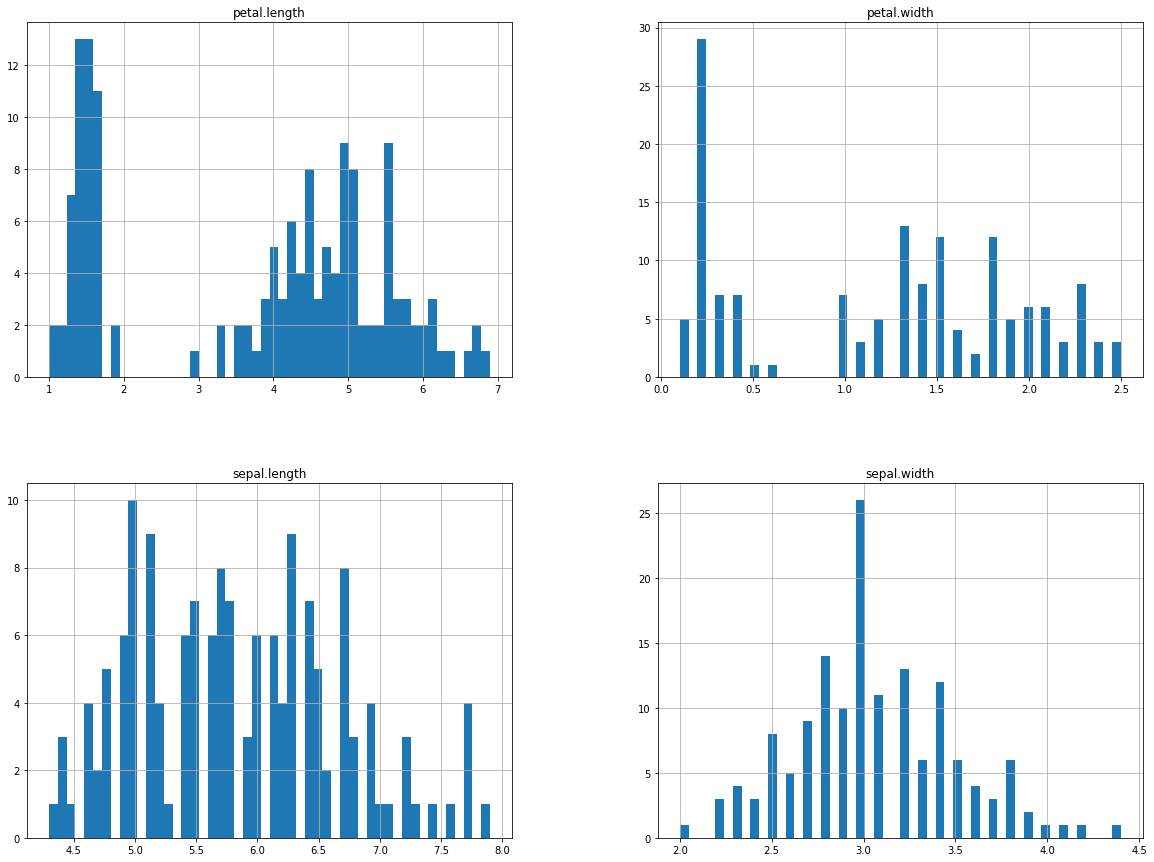

In [34]:
#Iris histograms
iris.hist(bins=50,figsize=(20,15))
plt.show()

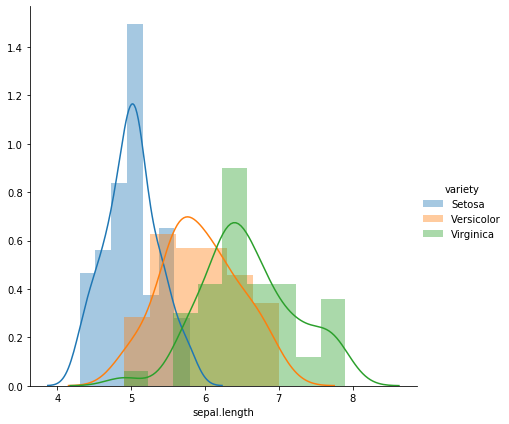

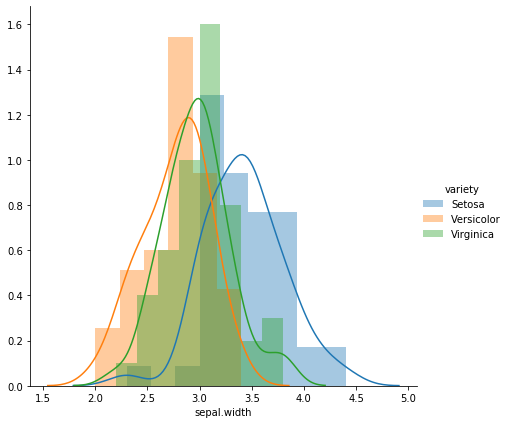

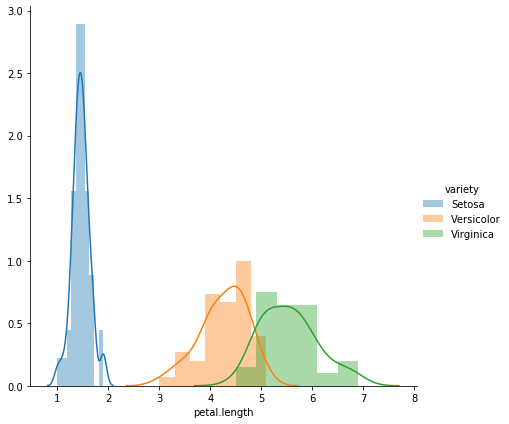

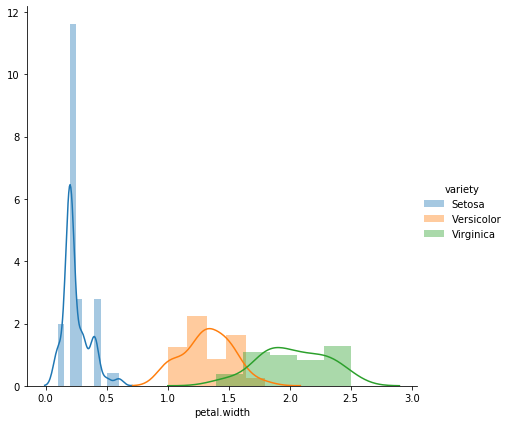

In [36]:
#joined distribution
for key, feature in enumerate(list(iris.columns)[:-1]):
    fg = sns.FacetGrid(iris, hue='variety', height=6)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()


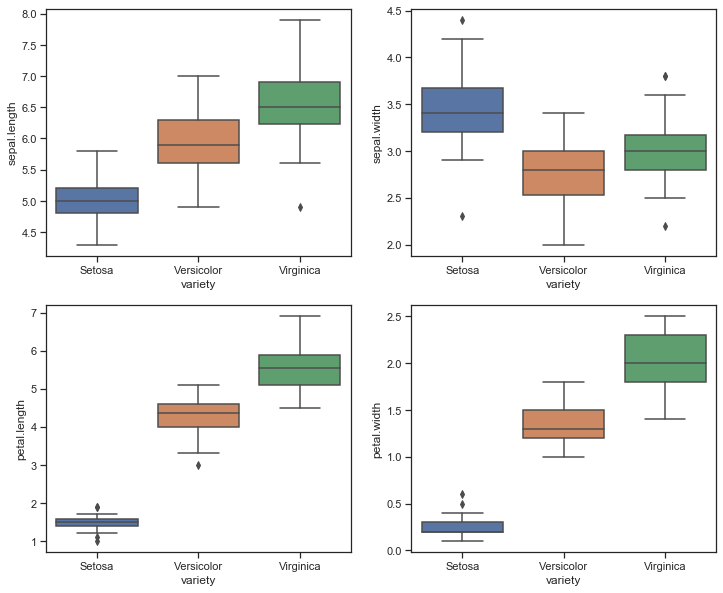

In [53]:
#boxplot betwen specie and sepal/petal
sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='variety',y='sepal.length',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='variety',y='sepal.width',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='variety',y='petal.length',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='variety',y='petal.width',data=iris)
plt.show()

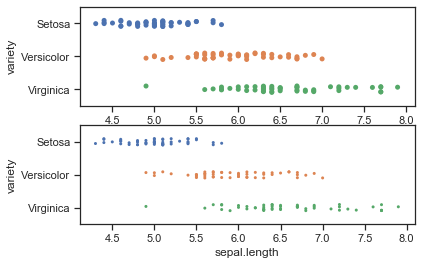

In [67]:
# Make a strip plot of 'sepal length' grouped by 'variety'
plt.subplot(2,1,1)
sns.stripplot(x='sepal.length', y='variety', data=iris)

# Make the strip plot again using jitter and a smaller point size
plt.subplot(2,1,2)
sns.stripplot(x='sepal.length', y='variety', data=iris,jitter=True, size=3)

# Display the plot
plt.show()

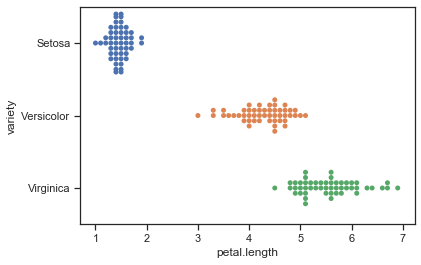

In [74]:
# Generate a swarm plot of 'petal.length' grouped horizontally by 'variety'  
sns.swarmplot(x='petal.length', y='variety', data=iris, orient='h')

plt.show()

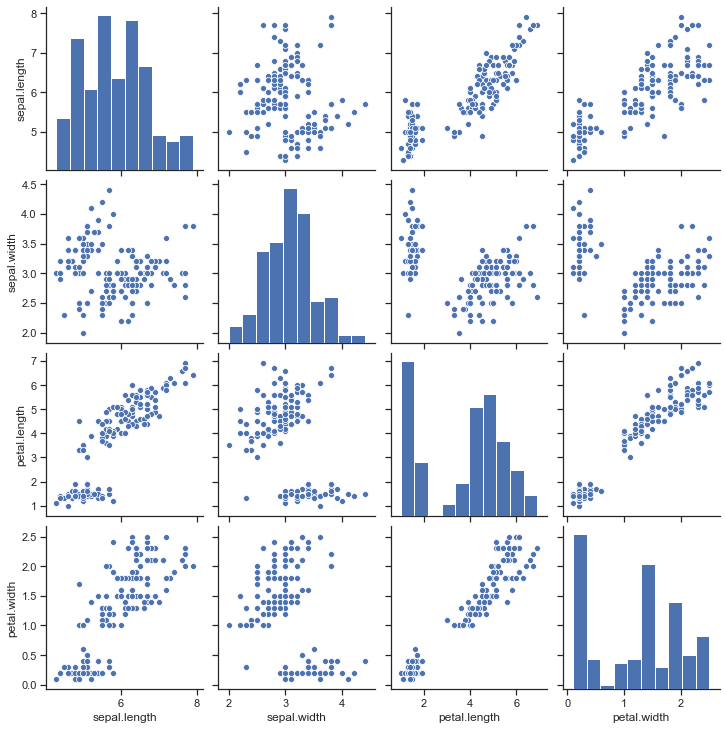

In [76]:
# Plot the pairwise joint distributions
sns.pairplot(iris)
# Display the plot
plt.show()

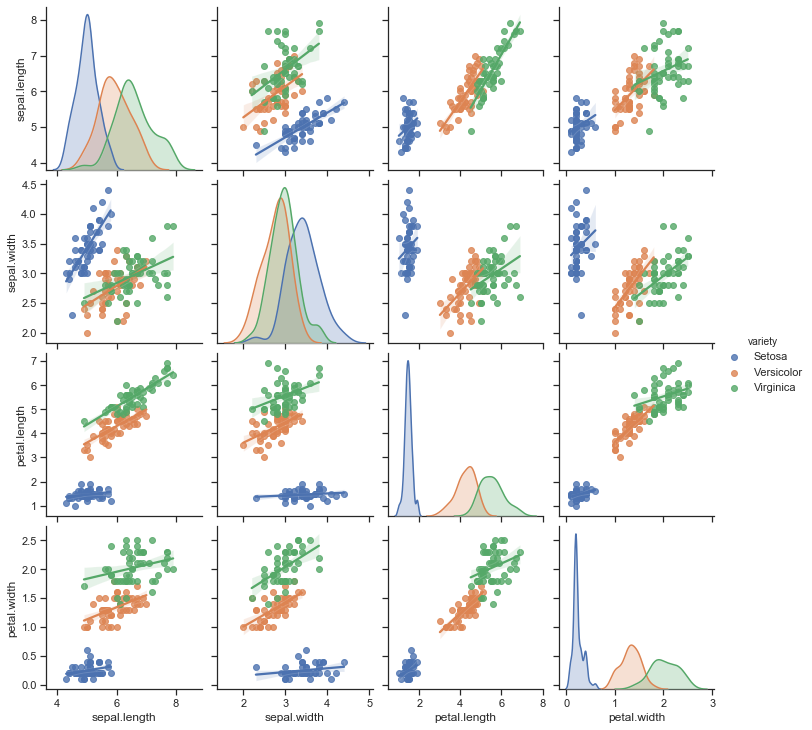

In [77]:
# Plot the pairwise joint distributions grouped by 'speciea' along with regression lines
sns.pairplot(iris, hue='variety',kind='reg')

# Display the plot
plt.show()

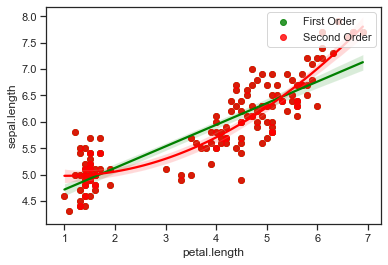

In [62]:
# Plot in blue a linear regression of order 1 between 'petal length' and 'sepal lenght'
sns.regplot(x='petal.length', y='sepal.length', data=iris, color='green', scatter=True, label='First Order')

# Plot in green a linear regression of order 2 between 'petal length' and 'sepal lenght'
sns.regplot(x='petal.length', y='sepal.length', data=iris, color='red',scatter=True,order=2, label='Second Order')

# Add a legend and display the plot
plt.legend(loc='upper right')
plt.show()

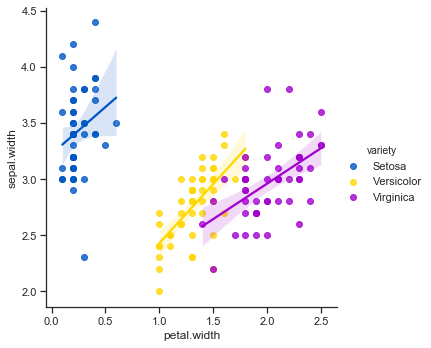

In [64]:
# Plot a linear regression between 'petal width' and 'sepal width', with a hue of 'specie'
sns.lmplot(x='petal.width',y='sepal.width',data=iris,hue='variety',palette='prism')

# Display the plot
plt.show()

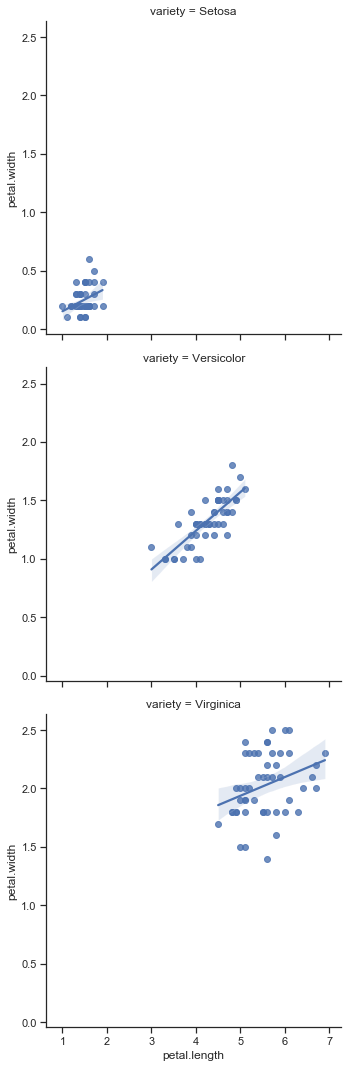

In [66]:
# Plot linear regressions between 'petal length' and 'petal width' grouped row-wise by 'specie'
sns.lmplot(x='petal.length',y='petal.width',data=iris, row='variety')

# Display the plot
plt.show()

In [57]:
iris_setosa = iris[iris['variety'] == 'Setosa']
iris_versicolor = iris[iris['variety'] == 'Versicolor']
iris_virginica = iris[iris['variety'] == 'Virginica']

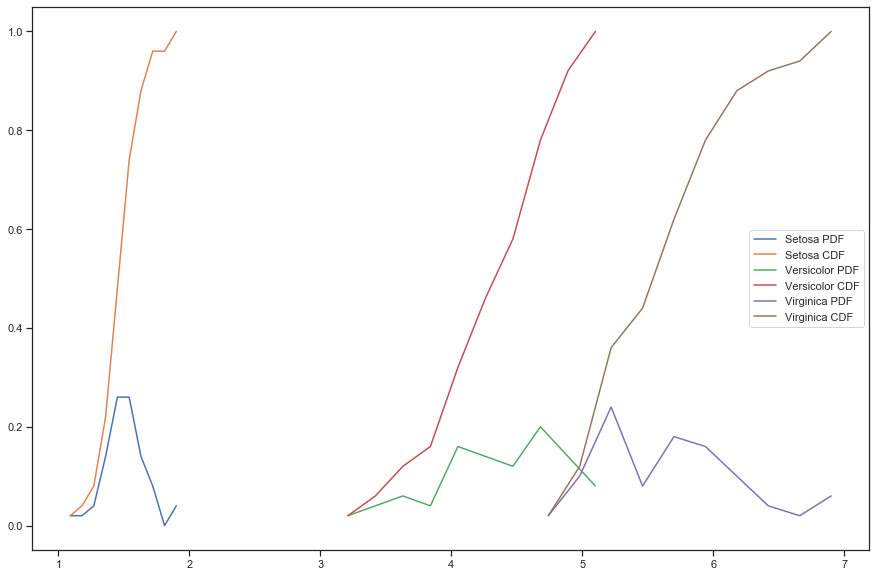

In [59]:
#CDF and PDF
plt.figure(figsize=(15,10))
counts, bin_edges = np.histogram(iris_setosa['petal.length'],
                                 bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'Setosa PDF')
plt.plot(bin_edges[1:], cdf, label = 'Setosa CDF')
counts, bin_edges = np.histogram(iris_versicolor['petal.length'],
                                 bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'Versicolor PDF')
plt.plot(bin_edges[1:], cdf, label = 'Versicolor CDF')
counts, bin_edges = np.histogram(iris_virginica['petal.length'],
                                 bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'Virginica PDF')
plt.plot(bin_edges[1:], cdf, label = 'Virginica CDF')
plt.legend()
plt.show()

#100 % of the Setosa species have petal length less than 1.9. 
#About 95 % of the Versicolor have petal length less than 5
#10% of the Virginica have petal length less than 5. 

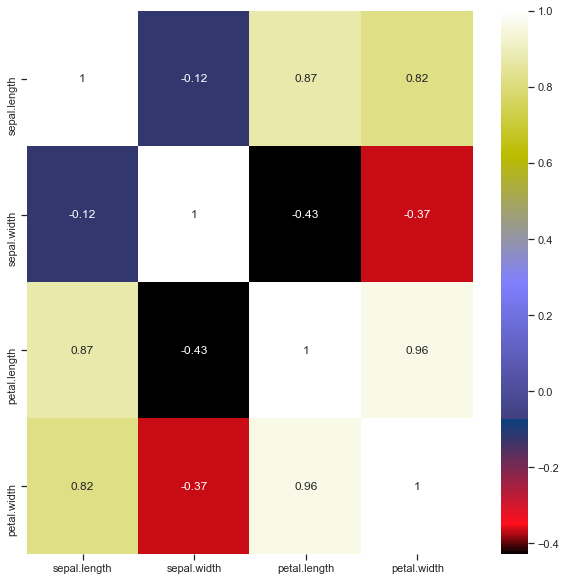

In [60]:
#Correlation Matrix
import seaborn as sns
import pandas as pd
corr = iris.corr()
plt.figure(figsize=(10,10)) 
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap='gist_stern', annot=True)


In [189]:
iris_ = iris.drop(['variety'], axis = 1)
iris_ = iris_.values

In [190]:
# K-MEANS k number of clusters
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(iris_)
    distortions.append(kmeanModel.inertia_)

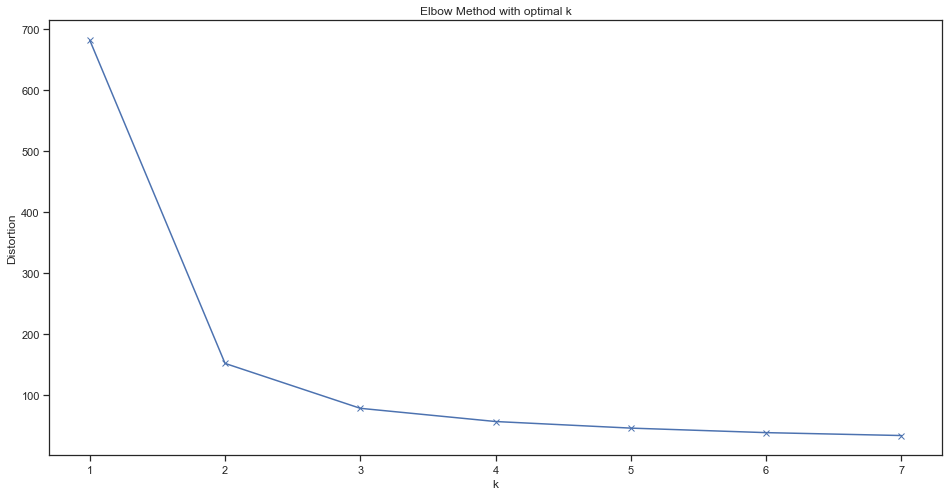

In [191]:
#Plotting the elbow
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method with optimal k')
plt.show()

In [192]:
#optimal k=3 prediction
kmeanModel = KMeans(n_clusters=3)
pred_kmeans = kmeanModel.fit_predict(iris_)
print(pred_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


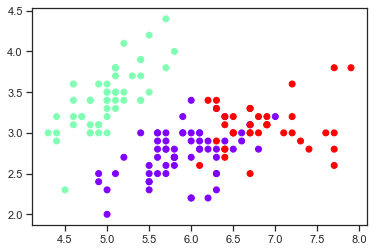

In [193]:
plt.scatter(iris_[:,0],iris_[:,1],c=pred_kmeans,cmap='rainbow')